# Lesson 1 Assignment - EnergyLoads
## Author - Lawrence Huang

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 


#### Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution, with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv"

# Load data
energy = pd.read_csv(fileName)

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object


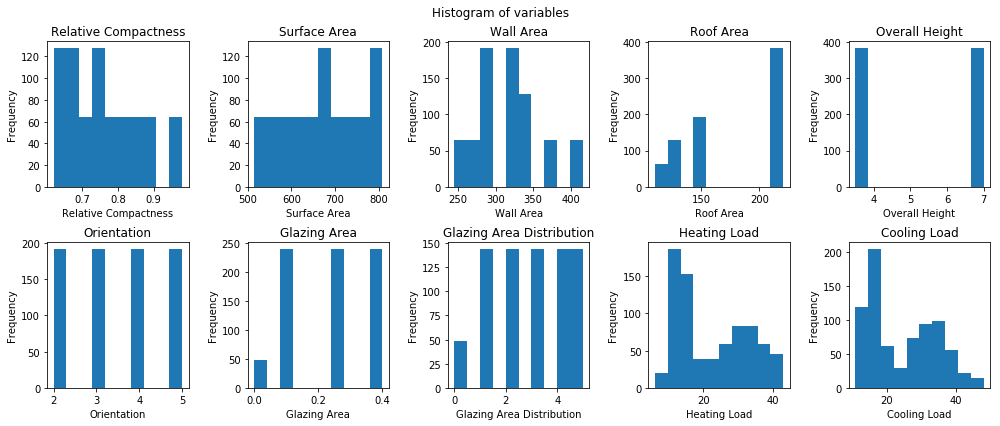

In [2]:
# Confirm that all variables in this dataset are numeric.
print(energy.dtypes)

# Examine distributions of all variables.
fig, axs = plt.subplots(2,5, figsize=(14,6))
col_list = np.reshape(list(energy.columns), (2,5))
for r, row in enumerate(axs):
    for c, col in enumerate(row):
        col.hist(energy[col_list[r, c]])
        col.set_title(col_list[r, c])
        col.set_ylabel('Frequency')
        col.set_xlabel(col_list[r, c])
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Histogram of variables')
plt.show()

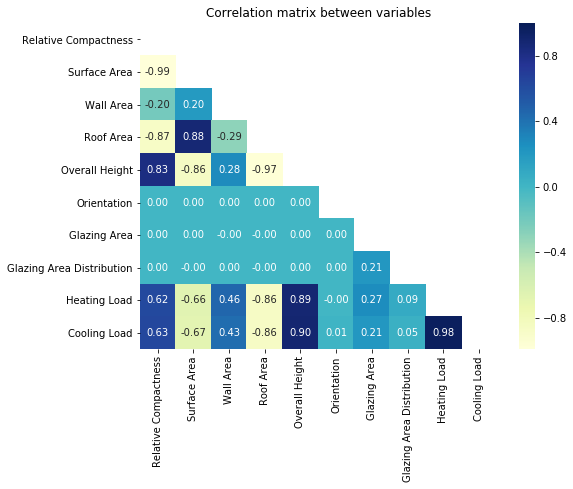

In [3]:
# Examine correlation between variables.
corrmat = energy.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
sns.heatmap(corrmat, mask=mask, annot=True, cmap='YlGnBu', fmt='.2f', ax=ax)
ax.set_title('Correlation matrix between variables')
plt.show()

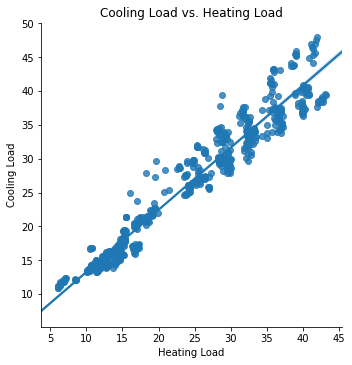

In [4]:
# Confirm that Heating Load and Cooling Load are strongly and positively correlated.
sns.lmplot('Heating Load', 'Cooling Load', data=energy)
ax = plt.gca()
ax.set_title('Cooling Load vs. Heating Load')
plt.show()

<b>Initial observations:</b><br>Heating Load is strongly, positively correlated with Cooling Load.<p>
From the correlation matrix, both Heating Load and Cooling Load:
<li>are strongly, positively correlated with Overall Height, and to a lesser extent Relative Compactness.</li>
    <li>are strongly, negatively correlated with Roof Area, and to a lesser extent Surface Area.</li>
    <li>are not correlated with Orientation, Glazing Area, Glazing Area Distribution.</li>
    <li>Many variables that affect Heating Load and Cooling Load are correlated with each other and will be further examined below.</li>
<p>
    From the variable histograms:<li>Heating Load and Cooling Load show a bimodal distribution.</li> <li>Overall Height has 2 discrete values.</li>
    <li>Orientation, Glazing Area, Glazing Area Distribution show few $(<7)$ discrete values.</li>

In [5]:
# Examine number of unique values.
print('unique values for all variables:')
print(energy.nunique())
# Find variables with <7 discrete values (levels).
print('\n\nvariables with <7 discrete values:')
print(energy.loc[:,list(energy.nunique()<7)].nunique())

unique values for all variables:
Relative Compactness          12
Surface Area                  12
Wall Area                      7
Roof Area                      4
Overall Height                 2
Orientation                    4
Glazing Area                   4
Glazing Area Distribution      6
Heating Load                 586
Cooling Load                 636
dtype: int64


variables with <7 discrete values:
Roof Area                    4
Overall Height               2
Orientation                  4
Glazing Area                 4
Glazing Area Distribution    6
dtype: int64


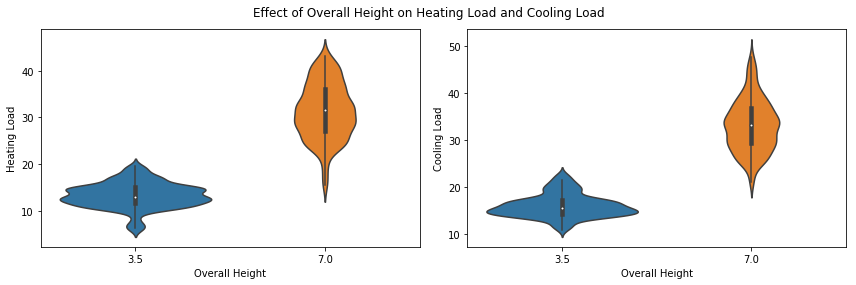

In [6]:
# Visualize effect of Overall Height on Heating Load and Cooling Load
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.violinplot(x='Overall Height', y='Heating Load', data=energy, ax=axs[0])
sns.violinplot(x='Overall Height', y='Cooling Load', data=energy, ax=axs[1])
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Effect of Overall Height on Heating Load and Cooling Load')
plt.show()

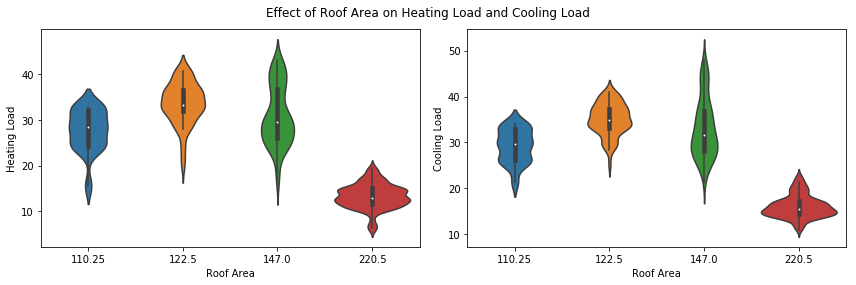

In [7]:
# Visualize effect of Roof Area on Heating Load and Cooling Load
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.violinplot(x='Roof Area', y='Heating Load', data=energy, ax=axs[0])
sns.violinplot(x='Roof Area', y='Cooling Load', data=energy, ax=axs[1])
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Effect of Roof Area on Heating Load and Cooling Load')
plt.show()

In [8]:
# Examine the relationship between Overall Height and Roof Area
energy[['Roof Area', 'Overall Height']].groupby(['Roof Area', 'Overall Height']).count()

,
Roof Area,Overall Height
110.25,7.0
122.50,7.0
147.00,7.0
220.50,3.5


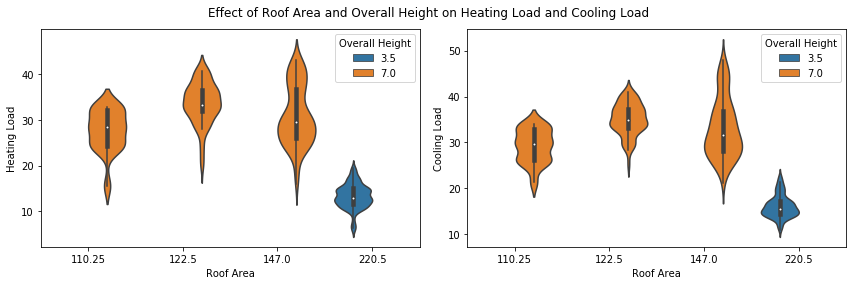

In [9]:
# Visualize effect of Roof Area and Overall Height on Heating Load and Cooling Load
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.violinplot(x='Roof Area', y='Heating Load', data=energy, ax=axs[0], hue='Overall Height')
sns.violinplot(x='Roof Area', y='Cooling Load', data=energy, ax=axs[1], hue='Overall Height')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Effect of Roof Area and Overall Height on Heating Load and Cooling Load')
plt.show()

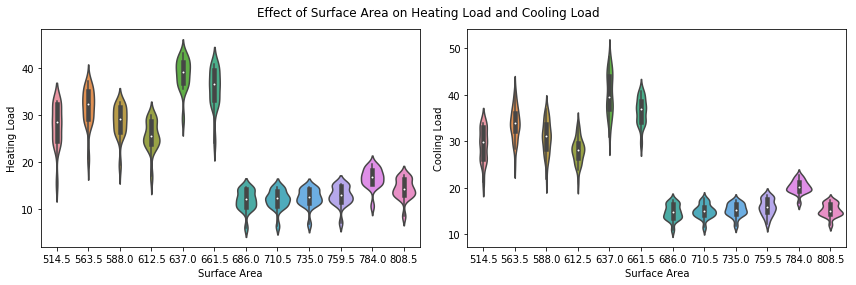

In [10]:
# Visualize effect of Surface Area on Heating Load and Cooling Load
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.violinplot(x='Surface Area', y='Heating Load', data=energy, ax=axs[0])
sns.violinplot(x='Surface Area', y='Cooling Load', data=energy, ax=axs[1])
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Effect of Surface Area on Heating Load and Cooling Load')
plt.show()

In [11]:
# Examine the relationship between Surface Area and Overall Height
energy[['Surface Area', 'Overall Height']].groupby(['Surface Area', 'Overall Height']).count()

,
Surface Area,Overall Height
514.5,7.0
563.5,7.0
588.0,7.0
612.5,7.0
637.0,7.0
661.5,7.0
686.0,3.5
710.5,3.5
735.0,3.5


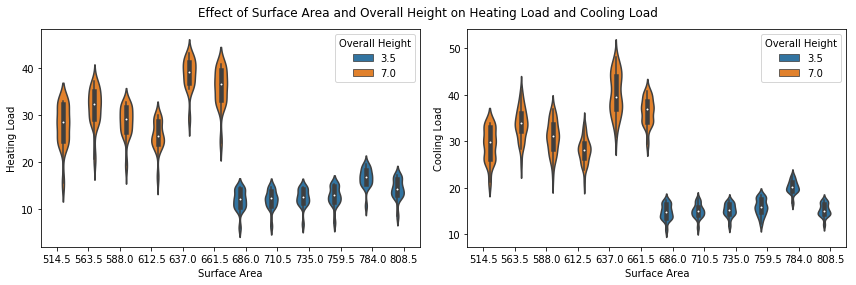

In [12]:
# Visualize effect of Surface Area and Overall Height on Heating Load and Cooling Load
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.violinplot(x='Surface Area', y='Heating Load', data=energy, ax=axs[0], hue='Overall Height')
sns.violinplot(x='Surface Area', y='Cooling Load', data=energy, ax=axs[1], hue='Overall Height')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Effect of Surface Area and Overall Height on Heating Load and Cooling Load')
plt.show()

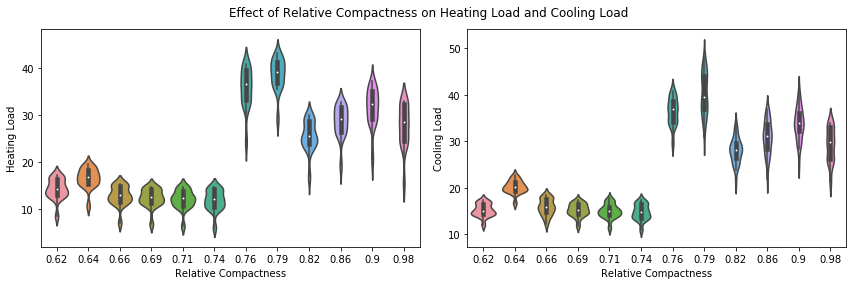

In [13]:
# Visualize effect of Relative Compactness on Heating Load and Cooling Load
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.violinplot(x='Relative Compactness', y='Heating Load', data=energy, ax=axs[0])
sns.violinplot(x='Relative Compactness', y='Cooling Load', data=energy, ax=axs[1])
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Effect of Relative Compactness on Heating Load and Cooling Load')
plt.show()

In [14]:
# Examine the relationship between Relative Compactness and Overall Height
energy[['Relative Compactness', 'Overall Height']].groupby(['Relative Compactness', 'Overall Height']).count()

,
Relative Compactness,Overall Height
0.62,3.5
0.64,3.5
0.66,3.5
0.69,3.5
0.71,3.5
0.74,3.5
0.76,7.0
0.79,7.0
0.82,7.0


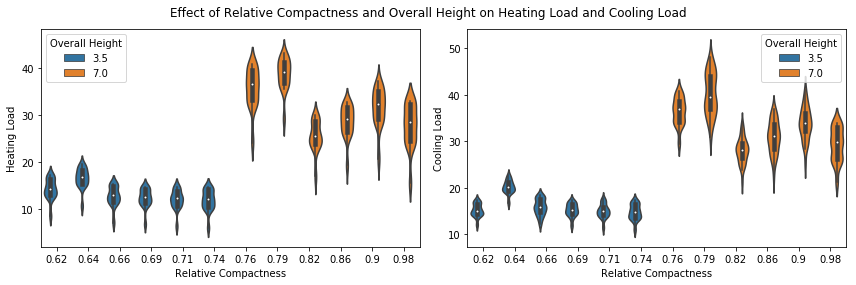

In [15]:
# Visualize effect of Relative Compactness and Overall Height on Heating Load and Cooling Load
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.violinplot(x='Relative Compactness', y='Heating Load', data=energy, ax=axs[0], hue='Overall Height')
sns.violinplot(x='Relative Compactness', y='Cooling Load', data=energy, ax=axs[1], hue='Overall Height')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Effect of Relative Compactness and Overall Height on Heating Load and Cooling Load')
plt.show()

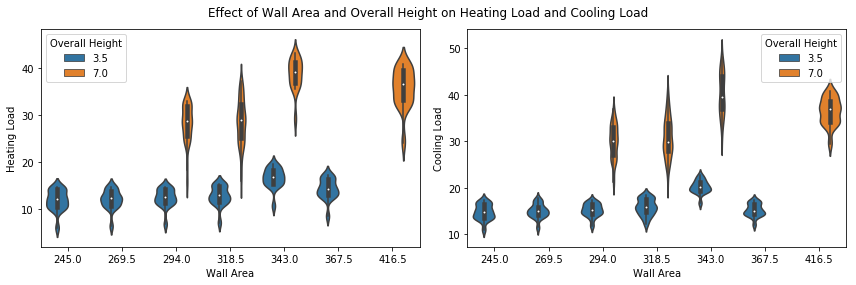

In [16]:
# Visualize effect of Wall Area and Overall Height on Heating Load and Cooling Load
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.violinplot(x='Wall Area', y='Heating Load', data=energy, ax=axs[0], hue='Overall Height')
sns.violinplot(x='Wall Area', y='Cooling Load', data=energy, ax=axs[1], hue='Overall Height')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Effect of Wall Area and Overall Height on Heating Load and Cooling Load')
plt.show()

<b>Observations:</b>
<li>Heating Load and Cooling load depends on Overall Height.</li>
<li>Heating Load and Cooling load depends on Roof Area, but Roof Area is correlated with Overall Height (Roof Area $<$ 220.5 has Overall Height of 7.0, otherwise has Overall Height of 3.5).</li>
<li>Heating Load and Cooling load depends on Surface Area, but Roof Area is correlated with Overall Height (Surface Area $<$ 686.0 has Overall Height of 7.0, otherwise has Overall Height of 3.5).</li>
<li>Heating Load and Cooling load depends on Relative Compactness, but Relative Compactness is correlated with Overall Height (Relative Compactness $<$ 0.76 has Overall Height of 3.5, otherwise has Overall Height of 7.0).</li>
    <li> For the same Wall Area (e.g. 294.0, 318.5, 343.0, etc), higher Overall Height gives higher Heating Load and Cooling Load. At the same Overall Height, no/little effect for Wall Area on Heating Load and Cooling Load.</li>

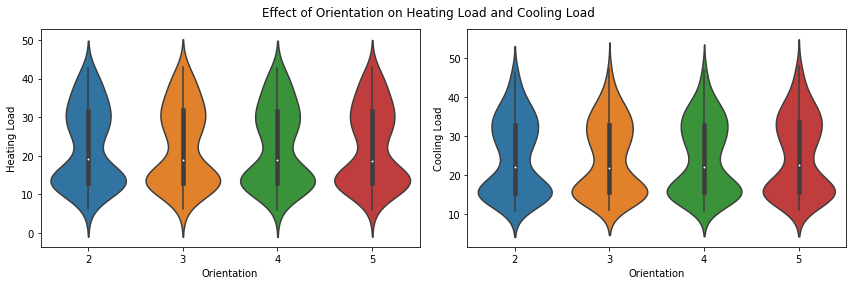

In [17]:
# Visualize effect of Orientation on Heating Load and Cooling Load
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.violinplot(x='Orientation', y='Heating Load', data=energy, ax=axs[0])
sns.violinplot(x='Orientation', y='Cooling Load', data=energy, ax=axs[1])
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Effect of Orientation on Heating Load and Cooling Load')
plt.show()

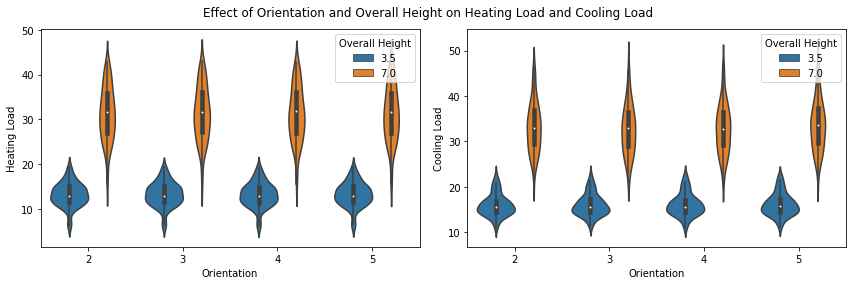

In [18]:
# Visualize effect of Orientation and Overall Height on Heating Load and Cooling Load
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.violinplot(x='Orientation', y='Heating Load', data=energy, ax=axs[0], hue='Overall Height')
sns.violinplot(x='Orientation', y='Cooling Load', data=energy, ax=axs[1], hue='Overall Height')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Effect of Orientation and Overall Height on Heating Load and Cooling Load')
plt.show()

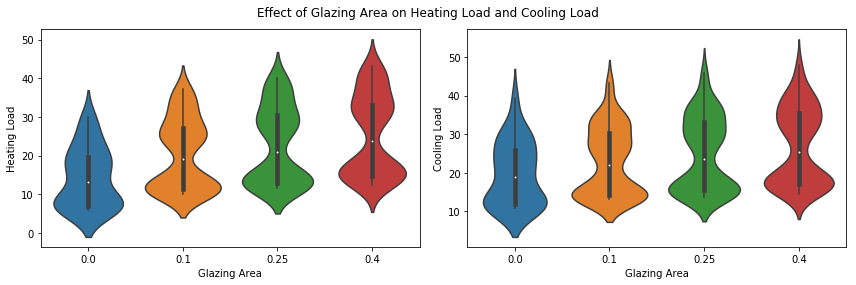

In [19]:
# Visualize effect of Glazing Area on Heating Load and Cooling Load
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.violinplot(x='Glazing Area', y='Heating Load', data=energy, ax=axs[0])
sns.violinplot(x='Glazing Area', y='Cooling Load', data=energy, ax=axs[1])
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Effect of Glazing Area on Heating Load and Cooling Load')
plt.show()

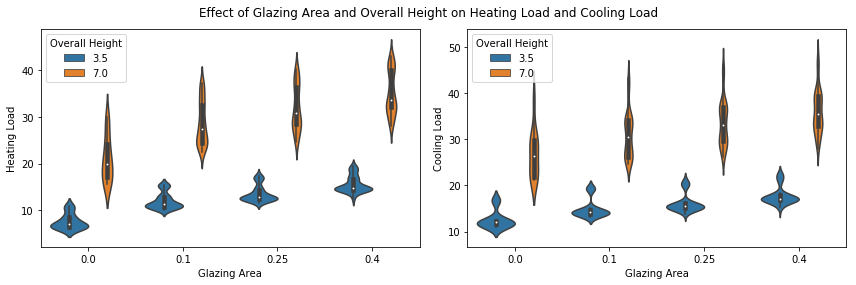

In [20]:
# Visualize effect of Glazing Area and Overall Height on Heating Load and Cooling Load
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.violinplot(x='Glazing Area', y='Heating Load', data=energy, ax=axs[0], hue='Overall Height')
sns.violinplot(x='Glazing Area', y='Cooling Load', data=energy, ax=axs[1], hue='Overall Height')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Effect of Glazing Area and Overall Height on Heating Load and Cooling Load')
plt.show()

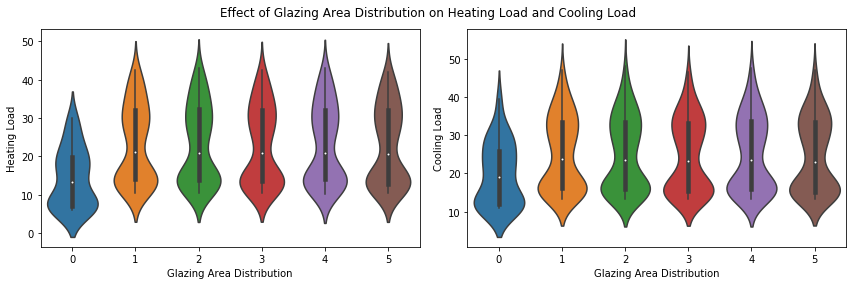

In [21]:
# Visualize effect of Glazing Area Distribution on Heating Load and Cooling Load
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.violinplot(x='Glazing Area Distribution', y='Heating Load', data=energy, ax=axs[0])
sns.violinplot(x='Glazing Area Distribution', y='Cooling Load', data=energy, ax=axs[1])
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Effect of Glazing Area Distribution on Heating Load and Cooling Load')
plt.show()

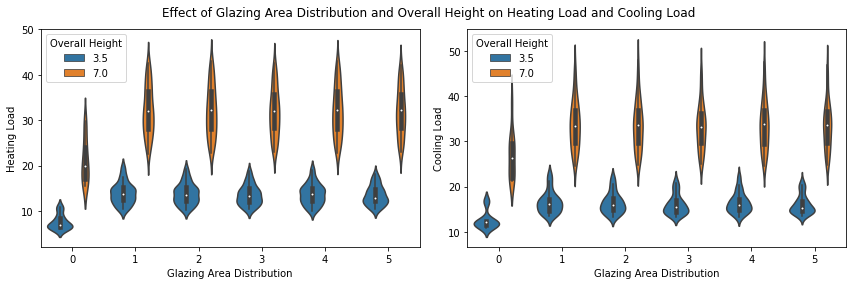

In [22]:
# Visualize effect of Glazing Area Distribution and Overall Height on Heating Load and Cooling Load
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.violinplot(x='Glazing Area Distribution', y='Heating Load', data=energy, ax=axs[0], hue='Overall Height')
sns.violinplot(x='Glazing Area Distribution', y='Cooling Load', data=energy, ax=axs[1], hue='Overall Height')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Effect of Glazing Area Distribution and Overall Height on Heating Load and Cooling Load')
plt.show()

In [23]:
# Examine the relationship between Glazing Area Distribution and Overall Height
energy[['Glazing Area Distribution', 'Overall Height']].groupby(['Glazing Area Distribution', 'Overall Height']).count()

Empty DataFrame
Columns: []
Index: [(0, 3.5), (0, 7.0), (1, 3.5), (1, 7.0), (2, 3.5), (2, 7.0), (3, 3.5), (3, 7.0), (4, 3.5), (4, 7.0), (5, 3.5), (5, 7.0)]

<b>Observation:</b><br>
Heating Load and Cooling Load do not appear to depend on Orientation, and appear to weakly depend on Glazing Area, and Glazing Area Distribution.

<b>Note:</b> please see additional observations in Markdown cells above.<p>
<b>Key points/interesting relationships:</b><br>
<ol>
    <li>Heating Load and Cooling Load are strongly, positively correlated with each other, and both depend on Overall Height, as judged by the Heating Load/Cooling Load vs. Overall Height violin plots. It is worth noting that from the histograms, Heating Load and Cooling Load show bimodal distributions, and Overall Height has 2 discrete values.</li><p>
    <li>Heating Load and Cooling Load depend on Roof Area, Surface Area, Relative Compactness, but Roof Area, Surface Area, Relative Compactness are also correlated with and depend on Overall Height, confounding their relationship.</li><p>
    <li>Overall, Heating Load and Cooling Load do not appear to depend on Orientation, and show a weak dependence on Glazing Area and Glazing Area Distribution, as judged by the degree of overlap of boxplots within the violin plots.<br> For Glazing Area Distribution, the 0 level shows the less overlap with other levels, however, overall there are large overlaps in the boxplots between groups.<br>(Interestingly, for violin plots of Heating Load and Cooling Load vs. Orientation, Glazing Area, and Glazing Area Distribution, the biomodal distributions of Heating Load and Cooling Load were evident, and could be separated when setting hue to Overall Height.)</li>
</ol>